Logistic Regression
model computes a weighted sum of the input features (plus a bias term), but instead
of outputting the result directly like the Linear Regression model does,

Equation 4-13. Logistic Regression model estimated probability (vectorized form)

p = hθ
(x) = σ (x
^T.
θ)

The logistic—noted σ(·)—is a sigmoid function (i.e., S-shaped) that outputs a number
between 0 and 1. It is defined as shown in Equation 4-14 and Figure 4-21.
Equation 4-14. Logistic function

σ (t )=
1/(
1 + exp (− t))

Notice that σ(t) < 0.5 when t < 0, and σ(t) ≥ 0.5 when t ≥ 0, so a Logistic Regression
model predicts 1 if x
T θ is positive, and 0 if it is negative.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:

X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int32)

print('x cordinates',X.shape)
print('y coordinates',y.shape)

x cordinates (150, 1)
y coordinates (150,)


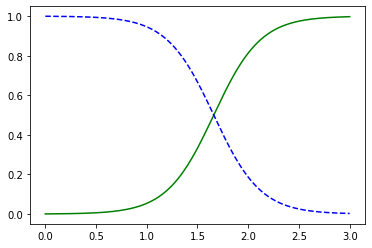

In [ ]:
import sklearn
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)


X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

y_proba = log_reg.predict_proba(X_new)


plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")




Equation 4-19. Somax score for class k
s
k
x = x
T.
θ
k
Note that each class has its own dedicated parameter vector θ
(k). All these vectors are
typically stored as rows in a parameter matrix Θ.

Equation 4-19. Somax score for class k

 
s
k(
x) = x^
T
θ^(
k)


Note that each class has its own dedicated parameter vector θ
(k). All these vectors are
typically stored as rows in a parameter matrix Θ.

Equation 4-20. Somax function


pk
= σ (s (x ))k
=
exp (s
k(
x))/
∑j = 1
^K
exp (s
j(
x))

In [ ]:
softmax_reg=LogisticRegression(C=100)
softmax_reg.fit(X,y)

LogisticRegression(C=100)

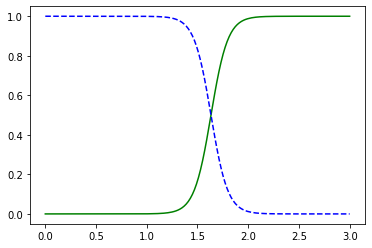

In [ ]:

X_new = np.linspace(0, 3, 150).reshape(-1, 1)

y_proba = softmax_reg.predict_proba(X_new)
#

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

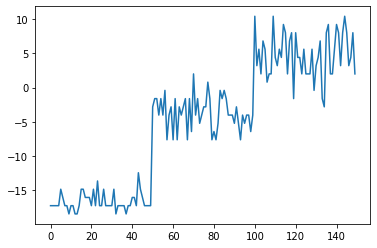

In [ ]:
plt.plot(softmax_reg.decision_function(X))

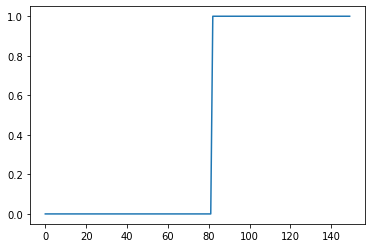

In [ ]:

pre=softmax_reg.predict(X_new)
plt.plot(pre)

pr=sklearn.metrics.precision_recall_curve(y,y_proba[:,1])

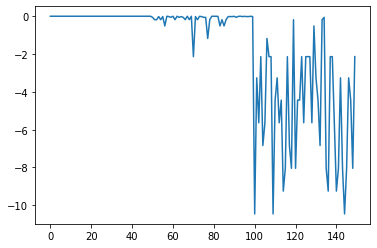

In [ ]:
plt.plot(softmax_reg.predict_log_proba(X)[:,0])
pre_p=softmax_reg.predict_log_proba(X)

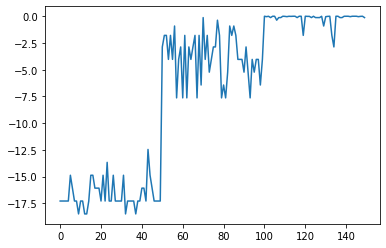

In [ ]:
plt.plot(softmax_reg.predict_log_proba(X)[:,1])

Precision and recall for logistic regression

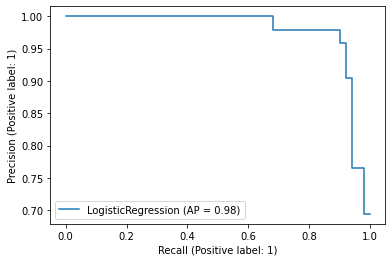

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay


PrecisionRecallDisplay.from_estimator(softmax_reg,X,y)

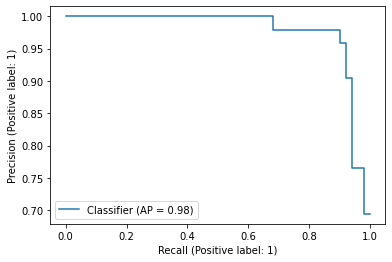

In [ ]:
PrecisionRecallDisplay.from_predictions(y,pre_p[:,1])

prcision, recall control by giving limit to threshold

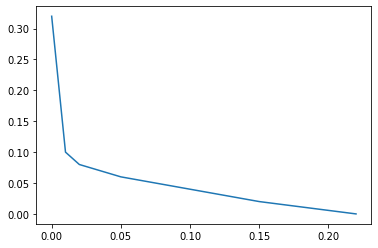

In [ ]:

y_scores = np.array([0.1, 0.4, 0.35, 0.8])


sklearn.metrics.det_curve(y,pre_p[:,1])

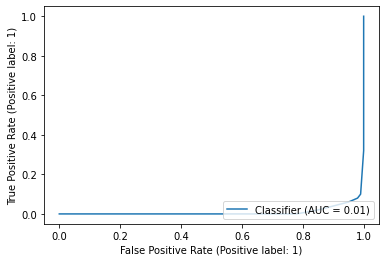

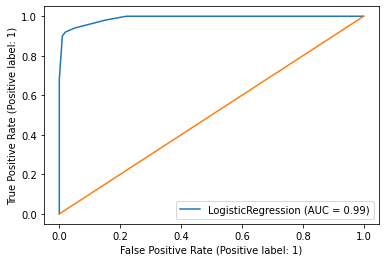

In [ ]:
from sklearn.metrics import RocCurveDisplay


RocCurveDisplay.from_predictions(y,pre_p[:,0])

RocCurveDisplay.from_estimator(softmax_reg,X,y)
plt.plot([0,1],[0,1],label='AUC')

hear ROC vs AOC which show the the Tp over FP